#  Introduction to Pandas
Working with data is most exciting job in 21st century. With this easily accessible internet technolgy and with abundance of data and freely available online sources to boost data anlysis skils available out there it has become easier for most of the people to dive in this field for either swithching to this career or accelerating present job or even for interest to invest in stock market. Understanding data and making inference out of it takes experience and a right track for starters. In this tutorial we will cover topics from as basic as dissecting data to advance as faster and parallel execution with "Ray" variant of Pandas.

In [1]:
import pandas as pd
import numpy as np

### Import BlackRock past one year Dataset (15 April 2018- 10 May 2019). This data is available in data folder. Some changes have been made in this data for this tutorial. ###

In [2]:
data = pd.read_csv('./data/BLK.csv')                            #change your path 

In [3]:
data.shape          # prints (rows,columns)

(19, 7)

In [4]:
data.info() # number of non-missing values, data-type for each column and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
Date         19 non-null object
Open         17 non-null float64
High         19 non-null float64
Low          19 non-null float64
Close        19 non-null float64
Adj Close    19 non-null float64
Volume       19 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ KB


Have understanding of data columns, data values by printing few entries. Following code prints first five examples of dataset. There are three things in dataframe to be taken care of for data crunching
* Index
* Columns
* Data values

Index and Column names make it easier to access a particular entry or subset of data.

In [5]:
data.head()         # prints 0-4 examples of data frame
# data.tail()       # prints last five entries of data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900


In case, you want to print any number of row then you can just pass an argument to the head command.

In [7]:
data.head(3) # print first 8 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200


In [8]:
print(data.columns)        # prints data column names
print(data.index)          # prints index name if any
# To set index name run following


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
RangeIndex(start=0, stop=19, step=1)


Check the type of columns and indexes

In [9]:
print(type(data.columns))
print(type(data.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


Both types seem closely related, infact pandas has number of similar objects reserved for either Index or column. Both Index and columns must be some kind of Index object. "issubclass" buildin method shows if RangeIndex is subclass of Index. Let's check

In [10]:
print(issubclass(pd.RangeIndex, pd.Index))

True


If it is more convenient to use index as any other column.

In [11]:
data.set_index('Volume').head() # to set "Volume" as index.

,Date,Open,High,Low,Close,Adj Close
Volume,,,,,,
590800,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985
1030700,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009
628200,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990
530400,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002
432900,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989


Now let's check for data types of columns

In [12]:
data.dtypes # return the datatypes for each column separately.

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
data.get_dtype_counts()      #counts of datatypes in dataframe.

float64    5
int64      1
object     1
dtype: int64

In [57]:
data.count()          # count of datatypes in dataframe for each column.

Date         19
Open         17
High         19
Low          19
Close        19
Adj Close    19
Volume       19
dtype: int64

In [32]:
open_data = data['Open']

In [15]:
print(open_data.min());
print(open_data.max());
print(open_data.mean());
print(open_data.median());
print(open_data.std());
print(open_data.sum());

453.10000599999995
486.839996
469.14000023529405
468.77999900000003
9.335423854402823
7975.380004


Now above statatistics could be found in one line of code i.e. __```open_data.describe()```__  (Please try yourself)

In [16]:
# get 0.2 quantile out of data
open_data.quantile(0.2)

461.91600339999997

In [25]:
# check if any null value
open_data.isnull()

'''
out []

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
Name: Open, dtype: bool
'''

# or
total_number_of_nulls = sum(open_data.isnull())
print(total_number_of_nulls)

2


In [17]:
open_data.notnull().sum() # this instance method perform exactly opposite to the isnull() method.

17

In [18]:
data.isnull().sum() # count the NaNs for each column.
# to count all of the NaNs 
# dataframe data.isnull().sum().sum()  

Date         0
Open         2
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
data.isnull().any().any() # to check quickly wheather there is NaN or not.
# data.isnull().any() to quickcheck NaN's column-wise. 

True

As we know that there may be sevral missing values in the dataframe. We have performed some calculations above like median, standard deviation. These all misisng get ignored during the calculations. We can include the missing values by running the following code.

In [20]:
print("The mean with excluded NaN is",data["Open"].mean(),"and the mean with incluede NaN is",data["Open"].mean(skipna=False))

The mean with excluded NaN is 469.14000023529405 and the mean with incluede NaN is nan


The setting __```skipna = False```__ enable the __NaN__ to get counted. This is the reason the mean was not calculated in the second case. By deault __```skipna = True```__. In this case, if all the values in the column are __NaN__, then obviously mean would be __NaN__ too.

Instead of skipping __NaN__ of deleting that particular row is not a good idea. So, let's try something different.

Fill __NaNs__ with some number, Now this some number depends on business cases corresponsing data would have. Lets fill it with __0__
for now.

In [21]:
filled_open_data = open_data.fillna(0)
# to fill NaNs of specific type say int, run following command


fill_open_data = open_data.fillna(0).astype(int)
# check if any NaNs now?
filled_open_data.isnull().sum()

0

If one has enough data and information would not be lost much then one can drop particular row which is having null value.

In [22]:
dropped_open_data = open_data.dropna()
dropped_open_data.isnull().sum()

0

If you afraid of losing the data by dropping the __NaN__ and also feel bad to replace it with zero, then we have better options to apply to the data. We can replace all the __NaN__ with the __mean__ or __median__. Let's do that.

In [24]:
open_data_mean_filled = open_data.fillna(open_data.mean()) # use median to fill with median.
open_data_mean_filled

0     456.359985
1     453.100006
2     466.980011
3     468.779999
4     463.750000
5     464.000000
6     474.029999
7     477.890015
8     475.109985
9     469.140000
10    479.739990
11    486.839996
12    479.510010
13    469.140000
14    472.920013
15    473.609985
16    462.179993
17    458.730011
18    461.850006
Name: Open, dtype: float64

The row 9 and 13 were __NaN__ but now it is filled by the mean of that particular column. Similar code is helpful for median as well. <br/> __```DataFrame.fillna(DataFrame.median())```__

One more way to fill the the missing values is to fill using __interpolation__. We will use here the __forward interpolation__.

In [34]:
open_data_ffill = open_data.ffill()   # filling missing values uinsg interpolation of the data
open_data_ffill == open_data_mean_filled 

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
Name: Open, dtype: bool

The output shows that the value of row 9 and 13 are different in both of the filling methods.

The forward filling method by default work across the column but it can be done across the rows by passing an argument __```axis = 1```__ to fill across the rows. This method will not work when the missing value is in the begining of the column or row.

Arithmetic Operations can be applied on Pandas series like positive, multiply, divide.

In [51]:
# addition of 1 in dropped_open_data column

add_dod = dropped_open_data + 1
mul_dod = dropped_open_data * 2
div_dod = dropped_open_data // 3

print(add_dod.head())
print(mul_dod.head())
print(div_dod.head())

0    457.359985
1    454.100006
2    467.980011
3    469.779999
4    464.750000
Name: Open, dtype: float64
0    912.719970
1    906.200012
2    933.960022
3    937.559998
4    927.500000
Name: Open, dtype: float64
0    152.0
1    151.0
2    155.0
3    156.0
4    154.0
Name: Open, dtype: float64


Following are three methods to change column names of dataframe

In [83]:
#Rename column names in pandas make list of new names and replace inplace with new names

#columns = ['date', 'open', 'high', 'low', 'close', 'Adj_close', 'vol']
#data.columns = columns

# rename and create new Dataframe
df = data.rename(columns={'Date': 'date', 'Open': 'open','High': 'high', 'Low':'low', 'Close':'close','Adj Close':'Adj_close','Volume':'vol'})

# Or rename the existing DataFrame (rather than creating a copy) 
#data.rename(columns={'Date': 'date', 'Open': 'open','High': 'high', 'Low':'low', 'Close':'close','Adj Close':'Adj_close','Volume':'vol'}, inplace=True)

Creating new column

In [84]:
# create new column with entries 0 (easiest one)
data['zero_risk'] = 0
# check column names in dataframe now
print('data columns after adding new column are :',data.columns)


data columns after adding new column are : Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'zero_risk'],
      dtype='object')


Sometimes it is helpful to access the data by sorting it accorting to a specific column. For example I want to access the data in increasing order of volume.

In [47]:
data.sort_values("Volume").head()  # By default it rearrange the data in ascending order. If descending order 
                            #is required then following command can be helpful.
#data.sort_values("Volume",ascending = False)

,Date,Open,High,Low,Close,Adj Close,Volume
9,4/29/2019,NaN,481.579987,478.609985,479.839996,479.839996,366900
13,5/3/2019,NaN,482.899994,476.410004,482.500000,482.500000,403300
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900
14,5/6/2019,472.920013,478.619995,469.869995,476.369995,476.369995,434400
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500


Pandas is able to run multiple operations in one go. For example,I want to sort the volumes and simultaneously willing to print first five rows of the data.

In [4]:
data.sort_values("Volume").head()

,Date,Open,High,Low,Close,Adj Close,Volume
9,4/29/2019,NaN,481.579987,478.609985,479.839996,479.839996,366900
13,5/3/2019,NaN,482.899994,476.410004,482.500000,482.500000,403300
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900
14,5/6/2019,472.920013,478.619995,469.869995,476.369995,476.369995,434400
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500


Any operation applied on the data set never alter the original data. From the above operations it seems that I have sorted the original data. Let's take a look at the original data.

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900


Well!! it still same as original data. Now what should I do if I required to alter the original data.



In [6]:
data.sort_values("Volume", inplace = True) # inplace command alter the original data.
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
9,4/29/2019,NaN,481.579987,478.609985,479.839996,479.839996,366900
13,5/3/2019,NaN,482.899994,476.410004,482.500000,482.500000,403300
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900
14,5/6/2019,472.920013,478.619995,469.869995,476.369995,476.369995,434400
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500


__```sort_values```__ is able to do more than that. It can sort the multiple columns in a single command. The list of the columns should be passed to the __```sort_values```__ command. The order of the sorting is same as the list passed to the command. For example, in __```data.sort_values(["High", "Low"])```__ __High__ sorted first and then __Low__.

In [46]:
data.sort_values(["High", "Low"]).head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500
18,5/10/2019,461.850006,465.640015,453.250000,463.000000,463.000000,484000
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700


**Great!!!** We are able to sort the data in different manner. But there are few __```NaN```__ in __Open__ column. What to do with that? By default, all the __```NaN```__'s are at the end but if we need to keep the __```NaN```__'s in the begining, then use the __```data.sort_values("Open", na_postion = first)```__

In [45]:
data.sort_values("Open",na_position = "first").head()

,Date,Open,High,Low,Close,Adj Close,Volume
9,4/29/2019,NaN,481.579987,478.609985,479.839996,479.839996,366900
13,5/3/2019,NaN,482.899994,476.410004,482.500000,482.500000,403300
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500


Now, Let's get the original data again.

In [21]:
data.sort_index(inplace = True) # sort the data according to the index.

### How to select the data

__to select the column__ <br/>
Sometimes it is helpful to access some specific columns for better vizualization of the data. Pandas allows this in very simple manner. Here let's access the "High" and "Low" only. A list needed columns should be passed to the data.

In [25]:
data[["High","Low"]] # selecting the column High and Low only.
data[["High","Low"]].head() 

,High,Low
0,457.100006,449.769989
1,466.890015,453.000000
2,468.779999,462.420013
3,469.369995,465.690002
4,465.660004,462.149994


__```Pandas```__  allow to select the data in the more specific manner. For example, we wish to select the columns having numbers only.

In [4]:
data.select_dtypes(include=['number']).head()

,Open,High,Low,Close,Adj Close,Volume
0,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,468.779999,469.369995,465.690002,465.690002,465.690002,530400
4,463.750000,465.660004,462.149994,464.019989,464.019989,432900


__```filter```__ method in pandas is also very felxible in selecting the data. It take a list or string to filter the data.

In [48]:
data.filter(["High","Low"]).head() # .head() can be ommited. It is just added to reduce the output data.

,High,Low
0,457.100006,449.769989
1,466.890015,453.000000
2,468.779999,462.420013
3,469.369995,465.690002
4,465.660004,462.149994


__```filter```__ method has an argument __```like```__. It takes a string and return all of the columns with heading which includes the provided string.

In [27]:
data.filter(like="o").head() # will return all the columns consisting "o".

,Low,Close,Adj Close,Volume
0,449.769989,451.859985,451.859985,590800
1,453.000000,466.540009,466.540009,1030700
2,462.420013,467.489990,467.489990,628200
3,465.690002,465.690002,465.690002,530400
4,462.149994,464.019989,464.019989,432900


__selecting the complete row__

In [51]:
data.loc[10] # selecting the 10th row

Date         4/30/2019
Open            479.74
High            485.85
Low             477.57
Close           485.24
Adj Close       485.24
Volume          567600
Name: 10, dtype: object

Above method can also be used to access the multiple rows at the same time. Passing a list of the indices of the row to be select.

In [17]:
data.loc[[0,2,3,5,8]]

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400
8,4/26/2019,475.109985,479.459991,471.850006,478.980011,478.980011,469000


__```loc```__ loc method can also select a slice of rows.

In [53]:
data.loc[5:10]  # selecting the rows from 5 to 10

,Date,Open,High,Low,Close,Adj Close,Volume
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400
6,4/24/2019,474.029999,482.369995,472.609985,480.170013,480.170013,1008500
7,4/25/2019,477.890015,480.480011,472.609985,474.450012,474.450012,598700
8,4/26/2019,475.109985,479.459991,471.850006,478.980011,478.980011,469000
9,4/29/2019,NaN,481.579987,478.609985,479.839996,479.839996,366900
10,4/30/2019,479.739990,485.850006,477.570007,485.239990,485.239990,567600


One more possible way to select the data using the __```loc```__ method is __```data.loc[initial,end,step]```__

In [50]:
data.iloc[4:19:2].head()

,Date,Open,High,Low,Close,Adj Close,Volume
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900
6,4/24/2019,474.029999,482.369995,472.609985,480.170013,480.170013,1008500
8,4/26/2019,475.109985,479.459991,471.850006,478.980011,478.980011,469000
10,4/30/2019,479.739990,485.850006,477.570007,485.239990,485.239990,567600
12,5/2/2019,479.510010,480.170013,471.470001,476.410004,476.410004,436100


* __```loc```__ and __```iloc```__ method look similar but they differ in a manner that __`iloc`__ takes only integers.
* There are two more methods __`at`__ and __`iat`__ which can replace __`loc`__ and __`iloc`__ because they are faster.

** Accessing a particular entry from dataframe ** <br/>
Python has number of in-built containers like lists, dictionary, tuple, each of which uses index to access element. In similar fashion Pandas has dataframe as complex container which uses index or column names to access data point.

In [7]:
# Access with Column name

data['Open']      #fetches "Open" pandas series
# one can rename this pandas series if one has to work with sigle column only
open_data = data['Open']
open_data.head()

0    456.359985
1    453.100006
2    466.980011
3    468.779999
4    463.750000
Name: Open, dtype: float64

Above method is recommended but there is another dot method i.e. __```data.Open```__ to access columns, which is quite error prone. You can not access column if the dataframe has column names with special characters and spaces in it as well as if column name is same as pandas DataFrame method name.

In [18]:
# Access complete row with index 
data.iloc[0]

Date         4/15/2019
Open            456.36
High             457.1
Low             449.77
Close           451.86
Adj Close       451.86
Volume          590800
Name: 0, dtype: object

The above method can also be used to select the multiple rows by passing a list of indices of required rows.

In [19]:
data.loc[[0,2,3,5,8]]

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400
8,4/26/2019,475.109985,479.459991,471.850006,478.980011,478.980011,469000


If the index of the dataframe is name rather than a number, then that particular index can be checked by the follwoing manner just to avoid any error in selecting the data.

In [58]:
data.iloc[[5, 10, 3]].index.tolist() # return the index name of the rows

[5, 10, 3]

The __`iloc`__ method accept the two slice arguments to crop the dataframe. We can use __`data.iloc[rows,columns]`__ to crop the required data.

In [5]:
data.iloc[5:10, 3:6] # cropping the data from the row 5 to 9 and simultaneously the columns from 3rd to 5th.
#data.iloc[:10] will select all the column

,Low,Close,Adj Close
5,463.899994,474.029999,474.029999
6,472.609985,480.170013,480.170013
7,472.609985,474.450012,474.450012
8,471.850006,478.980011,478.980011
9,478.609985,479.839996,479.839996


In [4]:
data.iloc[6,-3] # selecting the single entry from 7th row and 4rd column.

480.170013

here the index and the number if the row is same therefore the output is same as the input.

If the dataset is larger enought that knowing the index of the required column is not known. We must know that right column to avoid the error. In that index of that particular column can be determined using the following command. The same will work rows too if the rows index are not inegers.

In [123]:
Low_index = data.columns.get_loc('Low') #getting the index of the "Low" column
Low_index

3

In [7]:
data_ugds_ = data.filter(like='UGDS_')

### How to use operations on dataframe?

There are number of operations which are quite helpful to make data more sensible. For example, adding a new column whose values are based on the two columns. 
Here the range of the price fluctutations for a particular day to be calculate just by taking the difference of the  __```"High"```__ and __```"Low"```__ column.

In [16]:
data['Range'] = data['High']-data['Low'] # to calulate the range and putting into a new column.

In [17]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Range
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800,7.330017
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700,13.890015
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200,6.359986
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400,3.679993
4,4/22/2019,463.750000,465.660004,462.149994,464.019989,464.019989,432900,3.510010


* whenever a column is subjected under an operation then the all of the NaN's in that column remains NaN.

By default, all the operations are operated according to the columns but if operations according to the row, then __```axis```__ will help us to do so. The __```axis```__ has two possible values __```0 or 1```__. By default, it is __```0```__. Passing the __```axis=1```__ operates all the operations by taking the transpose of the data.

In [33]:
data.count(axis = 1).head() # counting the non-missing values of the data for each row.

0    8
1    8
2    8
3    8
4    8
dtype: int64

To take the sum of the all of the columns and adding it into a new row following procedure can be followed.

* Creating a copy of dataframe so that our original data remains intact therefore __```agg_data = data[data.columns]```__ is preferred over the __```agg_data = data```__.

In [6]:
agg_data = data[data.columns] 

* adding the all values of the required columns and then appending it to the dataframe.

In [7]:
agg_data.loc['Total']= agg_data[["Open","High", "Low", "Close", "Adj Close", "Volume"]].sum() # run this only once to avoid 
                                                                                              # repeated sum.
#agg_data.loc['Total']= agg_data[data.columns].sum() (This command is avoided because the sum of Date column is not required)

In [8]:
agg_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15,5/7/2019,473.609985,473.929993,459.059998,463.769989,463.769989,709500.0
16,5/8/2019,462.179993,469.459991,459.619995,465.470001,465.470001,454800.0
17,5/9/2019,458.730011,464.459991,454.160004,464.220001,464.220001,435500.0
18,5/10/2019,461.850006,465.640015,453.250000,463.000000,463.000000,484000.0
Total,NaN,7975.380004,9014.200012,8852.729948,8959.179991,8959.179991,10757300.0


### How to a analyse the data?

In [19]:
data.describe().T #(summary statistics for the numerical columns and transpose(using .T) the DataFrame for more readable output)

,count,mean,std,min,25%,50%,75%,max
Open,17.0,469.140000,9.335424,453.100006,462.179993,468.779999,475.109985,4.868400e+02
High,19.0,474.431580,8.471016,457.100006,467.835007,474.029999,481.029999,4.874500e+02
Low,19.0,465.933155,9.384924,449.769989,459.339997,465.690002,472.609985,4.787100e+02
Close,19.0,471.535789,8.721189,451.859985,464.845001,474.029999,479.055008,4.852400e+02
Adj Close,19.0,471.535789,8.721189,451.859985,464.845001,474.029999,479.055008,4.852400e+02
Volume,19.0,566173.684211,186107.017726,366900.000000,435800.000000,488600.000000,613450.000000,1.030700e+06


The __```describe```__ method can accept three arguments to customize the output (percentile, include & exclude). 

In [16]:
data.describe(percentiles = [0.01,0.40,0.07]).T # adding the 1%, 7% and 40% percentiles

,count,mean,std,min,1%,7.0%,40%,50%,max
Open,17.0,469.140000,9.335424,453.100006,453.621603,456.644388,465.192004,468.779999,4.868400e+02
High,19.0,474.431580,8.471016,457.100006,458.424803,464.766797,470.353991,474.029999,4.874500e+02
Low,19.0,465.933155,9.384924,449.769989,450.351391,453.065000,462.716009,465.690002,4.787100e+02
Close,19.0,471.535789,8.721189,451.859985,453.865188,463.200197,466.730005,474.029999,4.852400e+02
Adj Close,19.0,471.535789,8.721189,451.859985,453.865188,463.200197,466.730005,474.029999,4.852400e+02
Volume,19.0,566173.684211,186107.017726,366900.000000,373452.000000,410996.000000,472000.000000,488600.000000,1.030700e+06


To check the memory of the each column.

In [25]:
data.memory_usage(deep = True) 

Index          80
Date         1247
Open          152
High          152
Low           152
Close         152
Adj Close     152
Volume        152
dtype: int64

The memory usage can be reduced by converting the datatype. Let's reduce the memory of the ```Volume``` column.

Memory can be reduced if the columns have repeated values. i.e. the columns have less unique values. But in our dataframe there no repeated values as our dataset not large enough. Let's check!!!

In [38]:
data.select_dtypes(include = ["number", "object"]).nunique() # cheking the unique values in each column
#data["Volume"] = data["Volume"].astype(np.int8) # converting the datatype to 8 bit.

Date         19
Open         17
High         19
Low          18
Close        19
Adj Close    19
Volume       19
dtype: int64

There is significant reduction in the memory usage of each column without losing any information.

Clearly, there are no repated values in any of the column so we can't reduce the memory here. But in case, if there are repeated values in the columns then __```data['Required_Column'] = data['Required_column'].astype('category')```__ can be used to reduce the memory usage even more.

We can easily find the top n values or least n values for any column by using the __```nlargest```__ or __```nsmallest```__ method. Here, we are going the find the five days when the closing price is high.

In [42]:
data.nlargest(5, 'Close')[["Date","Close"]] # only printing the date and close column

,Date,Close
10,4/30/2019,485.239990
13,5/3/2019,482.500000
6,4/24/2019,480.170013
9,4/29/2019,479.839996
11,5/1/2019,479.130005


We can work on multiple columns at the same time. For example, we are finding the 5 days of lowest opening price out of the 10 days of highest closing price.

In [45]:
data.nlargest(10,"Close").nsmallest(5,"Open")

,Date,Open,High,Low,Close,Adj Close,Volume
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400
14,5/6/2019,472.920013,478.619995,469.869995,476.369995,476.369995,434400
6,4/24/2019,474.029999,482.369995,472.609985,480.170013,480.170013,1008500
8,4/26/2019,475.109985,479.459991,471.850006,478.980011,478.980011,469000
7,4/25/2019,477.890015,480.480011,472.609985,474.450012,474.450012,598700


The above method is equivalent to __```sort_values```__ and selecting the required __`n`__ rows. 

### How to use Boolean to data?

Pandas can apply Boolean to the dataframe to filter the data. If we wish to get the days when the closing price is higher than 467, then following would help us.

In [39]:
data["Close"]> 467 # return "True" if inequality holds.

0     False
1     False
2      True
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16    False
17    False
18    False
Name: Close, dtype: bool

In [44]:
(data["Close"]> 467).describe() # return non-missing values, no of unique values, top boolean and frequency of "True".

count       19
unique       2
top       True
freq        11
Name: Close, dtype: object

In [49]:
(data["Close"]> 467).value_counts(normalize = True) # Return the percentage if the "True" and "False" values.

True     0.578947
False    0.421053
Name: Close, dtype: float64

The Boolean conditions can be much more helpful in a analysing the data in a very specific manner. For example, we want to know the days when the closing price was higher than 467, opening price lower than 470 and the volume higher than 500000. Let's create these condition as variables.

In [103]:
condition1 = data["Close"]>467
condition2 = data["Open"]<470
condition3 = data["Volume"]> 500000
and_condition = condition1 & condition2 & condition3 # making a combined condition
and_condition.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

The above code can be reduce to a one line code just by putting all the condtion together. Here is an example. <br/>
__`and_condition = (data["Close"]>467) & (data["Open"]<470) & ( data["Volume"] > 500000)`__ 

If we use __`|`__ insetead of __`&`__, then it is called __`OR`__ condition. And offcourse, __`&`__ is an __`AND`__ condition. 

In [81]:
or_condition = condition1 | condition3 # OR condition for condition1 and condition3. 
or_condition.head()

0     True
1     True
2     True
3     True
4    False
dtype: bool

Now, I want to work with the data where the __`or_condition`__ is true then I can use simple command to select the data. By default __`data[or_condition]`__ will select the data where the __`or_condition`__ holds. Otherwise, we can use __`data[or_condition == False]`__ to invert the selection.  

In [91]:
data[or_condition].head() #selecting the data where or_condition holds true.

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400


In [96]:
(data.loc[or_condition] == data[or_condition]).head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True


Both __`data.loc[or_condition]`__ and __`data[or_condition]`__ seems to be same but they do not work if there are __`NaN`__ in the dataframe becuase two __`NaN`__'s are not equal. If we fill the __`NaN`__ as we did earlier then it works.

In [105]:
(data.loc[or_condition] == data[or_condition]).loc[9]["Open"] # Output is "False" because there is a NaN at that position.

False

The Boolean can be applied to a specific column the same way as we did above. 

In [122]:
data[data["Volume"] > 500000 ].head() # picking the days when the "Volume" > 500000.

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/15/2019,456.359985,457.100006,449.769989,451.859985,451.859985,590800
1,4/16/2019,453.100006,466.890015,453.000000,466.540009,466.540009,1030700
2,4/17/2019,466.980011,468.779999,462.420013,467.489990,467.489990,628200
3,4/18/2019,468.779999,469.369995,465.690002,465.690002,465.690002,530400
5,4/23/2019,464.000000,474.029999,463.899994,474.029999,474.029999,687400


The boolean selection is relatively slow than the index selection but boolean selection more flexible than the index seletion. To check the time taken by the command to run, we can add __`%timeit`__ before the code.

In [131]:
%timeit data[condition1|condition3]
%timeit data[or_condition]

1.78 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
944 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Let's start working in Stock Price way!

Here is the code for basic plot of __Closing price__ of the given stocks. Breakdown of each code line given in front of the line.

In [3]:
data_close = data[["Date",'Close']]                          # selecting the data of closing price
data_close.set_index("Date", inplace = True)                 # changing the x axis to be the date
data_summary = data_close.describe(percentiles=[.1, .9])     # chosing the 10% and 90% precentile
upper_10 = data_summary.loc['90%']                           # chosing 90% to be the resistance
lower_10 = data_summary.loc['10%']                           # chosing 10% to be the support
criteria = (data_close < lower_10) | (data_close > upper_10) # defining the condition 
data_top_bottom_10 = data_close[criteria]                    # selecting the data which is out of the 10% and 90% precentile 

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\surjeet\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


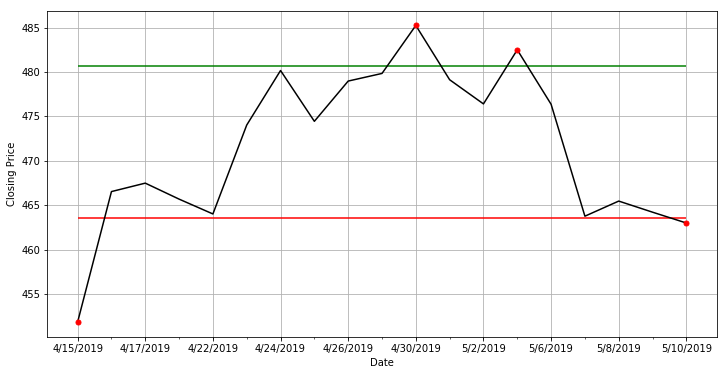

In [20]:
fig= plt.figure(figsize=(12,6))                                   # Creating the empty plot
plt.plot(data_close, color = "black")                             # Ploting closing price                       
plt.plot(data_top_bottom_10, marker = "o", color = "r", ms = 5)   # drawing the data points out of the selected percentile
(xmin,xmax) = (criteria.index[0], criteria.index[-1])             # Chosing the starting point and end point
plt.hlines(y = [upper_10], xmin=xmin,xmax=xmax, color='green')    # drawing the resistance with green
plt.hlines(y = [lower_10], xmin = xmin, xmax = xmax,color = 'red')# drawing the support line with red
ax = plt.axes()                                                   # making the axis
plt.xlabel("Date")                                                # Naming the x-axis
plt.ylabel('Closing Price')                                       # Naming the y-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))             # Setting the major ticks for x-axis
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))             # Setting the minor ticks for x-axis
plt.grid()                                                        # drawing the gridlines
plt.show()                                                        # Showing the plot

From the above graph it is clear that there are only 2 days haivng the closing price above the 480.636010 and lower than 463.615991.

## Data Aggrigation

__Data aggrigation__ is assigning a single value to the column. There are several data aggrigation such as we need mean, median of the column. For __data aggrigation__, catagorical data is a better option to use because we can makes groups for the catagorical data. Let us import some catagorical data.

In [37]:
data1 = pd.read_csv('./data/zomato.csv', nrows = 100)

Checking the columns available. It is very important that we should know the available columns and which columns we can drop from the data.

In [28]:
list(data1.columns)

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Dropping few columns just for the educational purpose.

In [38]:
data2=data1[['address', "name","online_order","book_table","rate","votes","location",'approx_cost(for two people)']]
data3 = data1[["address","rest_type","dish_liked"]] # will use it later.

In [30]:
data2.head()

,address,name,online_order,book_table,rate,votes,location,approx_cost(for two people)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,800
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,800
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,800
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,300
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,600


Let us create little question that I would like to know the average rating for the restaurant which have/not have option for online order. To solve this problem, I have to group the data into two groups one group consists the restaurant have online order booking and other do not have that option.

Before taking the mean of both groups, I should convert the __"rate"__ column into datatype as it is an object.

In [102]:
data2.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
approx_cost(for two people)    object
dtype: object

By reading the values of the __rate__ column, I get the information that it has a general format as __4.5/5__. I don't need __/5__ so I need to slice it out. So here is one line code to perform this task.

In [31]:
data2["rate"]= data2["rate"].str.slice(0,-2,1)          # command to slice /5 from the rate column

C:\Users\surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
data2["rate"][:4]

0    4.1
1    4.1
2    3.8
3    3.7
Name: rate, dtype: object

In [130]:
data2.head()

,address,name,online_order,book_table,rate,votes,location,approx_cost(for two people)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,800
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,800
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,800
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,300
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,600


__Wait!!!__ this column is not ready to perform any calculations yet. As you can see that the datatype is still __object.__ __Well!__,This is a simple task.

In [131]:
data2['rate'] = pd.to_numeric(data2['rate'], errors='coerce')   # changing string into float
data2["rate"][:4]

C:\Users\surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    4.1
1    4.1
2    3.8
3    3.7
Name: rate, dtype: float64

As we can see that the datatype for the rate column is float64 now. Now, this column is ready perform calculations.

In [132]:
data2.groupby("online_order")["rate"].mean()      # caculating the average value rating

online_order
No     3.676923
Yes    3.850909
Name: rate, dtype: float64

The inference from this data is that the people prefer the restaurants having option for onine booking.

**Well!** this can be done in one go for all the columns with numeric datatype. Here is the example.

In [133]:
data2.groupby("online_order").mean()

,rate,votes
online_order,,
No,3.676923,139.111111
Yes,3.850909,570.963636


In the case of large number of columns, the name of the column may misleads. To avoid this we will rename the column when we aggregate the data.

In [134]:
data2.groupby("online_order").mean().add_prefix("mean_")

,mean_rate,mean_votes
online_order,,
No,3.676923,139.111111
Yes,3.850909,570.963636


`groupby` operation can take a list as an argument. It will group the data by all input arguments.

In [136]:
data2.groupby(["location","online_order","book_table"]).mean()
#data1.groupby(["location","online_order","book_table"]).mean().unstack()    # try it and observe the changes

rate        votes
location             online_order book_table                       
Banashankari         No           No          3.662857   125.121951
                                  Yes         4.000000   808.000000
                     Yes          No          3.766667   315.966667
                                  Yes         4.316667  1092.500000
Basavanagudi         No           No          3.800000   157.000000
                     Yes          No          3.825000   389.500000
Jayanagar            Yes          No          4.100000  2484.250000
Kumaraswamy Layout   Yes          No          3.566667   431.000000
                                  Yes         3.600000   163.000000
Mysore Road          No           No          3.600000     8.000000
Rajarajeshwari Nagar Yes          No          3.700000   679.000000
Vijay Nagar          Yes          No          3.950000    90.500000

As we can see here that the data is grouped in a sequence of arguments passed.

The above table only represent the means of the grouped data but how do we know that how many values are there underlying this mean value!<br/>
**Don't worry!!** `pandas` will do it for you.

In [14]:
data2.groupby(["location","online_order","book_table"]).size()

location              online_order  book_table
Banashankari          No            No            41
                                    Yes            1
                      Yes           No            30
                                    Yes            6
Basavanagudi          No            No             2
                      Yes           No             8
Jayanagar             Yes           No             4
Kumaraswamy Layout    Yes           No             3
                                    Yes            1
Mysore Road           No            No             1
Rajarajeshwari Nagar  Yes           No             1
Vijay Nagar           Yes           No             2
dtype: int64

In the large datasets aggregating over all the columns is not a good idea. Desired column can be chosen by one line code.

In [137]:
data2.groupby(["location","online_order","book_table"])["rate"].mean() # applying aggregation only on rate column

location              online_order  book_table
Banashankari          No            No            3.662857
                                    Yes           4.000000
                      Yes           No            3.766667
                                    Yes           4.316667
Basavanagudi          No            No            3.800000
                      Yes           No            3.825000
Jayanagar             Yes           No            4.100000
Kumaraswamy Layout    Yes           No            3.566667
                                    Yes           3.600000
Mysore Road           No            No            3.600000
Rajarajeshwari Nagar  Yes           No            3.700000
Vijay Nagar           Yes           No            3.950000
Name: rate, dtype: float64

In [187]:
def top_n(df, n=5, column='rate'):return df.sort_values(by=column, ascending = False)[:n] #return top 5 values of passed columns 

In [184]:
top_n(data2, 6 , "votes") # input parameters can be changed

,address,name,online_order,book_table,rate,votes,location,approx_cost(for two people)
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.4,4884,Jayanagar,750
86,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,Yes,No,4.4,4401,Jayanagar,600
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,600
44,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,600
65,"31, Opposite Vijaya College, RV Road, Basavana...",Kabab Magic,Yes,No,4.1,1720,Basavanagudi,400
37,"8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...",Szechuan Dragon,Yes,No,4.2,1647,Banashankari,600


So there are the top 5 restaurant of Banglore by rating. This function can be applied to complete dataset by using `apply` method. The `apply` method apply the defined fuction on the complete dataset.

In [191]:
data2.groupby(["online_order"]).apply(top_n)

address  \
online_order                                                         
No           52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   
             60  942, 3rd Floor, 21st Main Road, 2nd Stage, Ban...   
             67  10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
             71  476, 2nd Floor, 9th Cross, Avalahalli BDA Park...   
             13  111, Sapphire Toys Building, 100 Feet Ring Roa...   
Yes          7   2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
             44  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
             38  4, Opposite NMKRV College, 21st C Cross Road, ...   
             86  52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...   
             34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   

                                   name online_order book_table  rate  votes  \
online_order                                                                   
No           52  Corner House Ice Cream           No         No   4.3    345   
             60           Peppy Peppers           No         No   4.2    244   
             67      Gustoes Beer House           No         No   4.1    868   
             71        The Biryani Cafe           No         No   4.1    520   
             13              Caf-Eleven           No         No   4.0    424   
Yes          7                   Onesta          Yes        Yes   4.6   2556   
             44                  Onesta          Yes        Yes   4.6   2556   
             38       Empire Restaurant          Yes         No   4.4   4884   
             86           Meghana Foods          Yes         No   4.4   4401   
             34                  Faasos          Yes         No   4.2    415   

                     location approx_cost(for two people)  
online_order                                               
No           52  Banashankari                         400  
             60  Banashankari                         800  
             67  Banashankari                       1,200  
             71  Banashankari                         300  
             13  Banashankari                         450  
Yes          7   Banashankari                         600  
             44  Banashankari                         600  
             38     Jayanagar                         750  
             86     Jayanagar                         600  
             34  Banashankari                         500

### Grouping by dictionary

Let's generate some data to use this method.

In [21]:
import random
array = ([[random.randrange(30, 100) for i in range(6)] for i in range(6)])
students = pd.DataFrame(array,columns=['a', 'b', 'c', 'd','e','f']
                      ,index=['Aarti Balana', 'Surjeet Singh', 'Sukhchain Singh', "Himanshu Behl",'Sheenam Handa', 'Natasha Chugh'])
#people.loc[2:3, ['b', 'c']] = np.nan # adding some NA values
#students["Total"]=students.sum(axis = 1) # creating a column with total marks

In [39]:
#students.sort_values("Total")
students

,a,b,c,d,e,f
Aarti Balana,58,39,55,89,46,92
Surjeet Singh,63,94,64,98,75,83
Sukhchain Singh,82,85,47,72,65,53
Himanshu Behl,75,36,52,47,86,89
Sheenam Handa,93,30,62,78,96,99
Natasha Chugh,49,53,43,65,88,94


In the above dataframe the name of the columns purposely given as __a, b, c, d, e, f__. We will modify them with the example of code.

Creating a mapping.

In [29]:
mapping = {'a': 'Theory', 'b': 'Practical', 'c': 'Theory', 'd': 'Practical', 'e': 'Theory', 'f' : 'Practical'}

In [25]:
students.groupby(mapping, axis=1).sum()

,Practical,Theory
Aarti Balana,160,175
Surjeet Singh,172,227
Sukhchain Singh,223,190
Himanshu Behl,198,231
Sheenam Handa,187,191
Natasha Chugh,185,147


### Group by Series

In [37]:
map_series = pd.Series(mapping) #Creating a series from previous defined mapping 

In [90]:
students.groupby(map_series, axis=1).sum()

,Practical,Theory
Aarti Balana,218,230
Surjeet Singh,204,196
Sukhchain Singh,249,190
Himanshu Behl,198,228
Sheenam Handa,159,262
Natasha Chugh,160,213


The results from the previous mapping is same as above but both of the mapping are differs by their definition.

Now let's give the name of the columns in a more readable way. Consider them as the courses __Physics,__ __Mathematics__ and __Chemistry__.

In [34]:
courses = {'a': 'Physics Theory', 'b': 'Physics Practical', 'c': 'Mathematics Theory', 'd': 'Mathematics Lab.', 
           'e': 'Chemistry Theory', 'f' : 'Chemistry Practical'}

In [35]:
students.rename(columns = courses)

,Physics Theory,Physics Practical,Mathematics Theory,Mathematics Lab.,Chemistry Theory,Chemistry Practical
Aarti Balana,61,98,41,75,75,45
Surjeet Singh,97,85,46,76,60,89
Sukhchain Singh,40,64,94,47,58,88
Himanshu Behl,71,95,70,53,57,94
Sheenam Handa,68,45,31,82,55,37
Natasha Chugh,91,96,30,48,72,54


In [43]:
students.groupby(map_series, axis = 1).transform(np.mean) # replace every value by the mean value

,a,b,c,d,e,f
Aarti Balana,59.000000,72.666667,59.000000,72.666667,59.000000,72.666667
Surjeet Singh,67.666667,83.333333,67.666667,83.333333,67.666667,83.333333
Sukhchain Singh,64.000000,66.333333,64.000000,66.333333,64.000000,66.333333
Himanshu Behl,66.000000,80.666667,66.000000,80.666667,66.000000,80.666667
Sheenam Handa,51.333333,54.666667,51.333333,54.666667,51.333333,54.666667
Natasha Chugh,64.333333,66.000000,64.333333,66.000000,64.333333,66.000000


The mean value for __Theory__ and __Practical__ is different so there are two mean values.

### Merging the DataFrames

Some times the data is available in different files and we merge them to roduce efficient results. Remeber!! we had already created a piece of "zomato' data. We will use this data to merge with another data.

We are going to merge data2 and data3. But first we need to modify the data3 into an appropriate format.

In [41]:
merged = pd.merge(data2, data3, on ="address") # merge function will keep the "address" column same
#merged = pd.merge(data2, data3, right_index = True, left_index = True) # There will be two columns for address
merged.head()

,address,name,online_order,book_table,rate,votes,location,approx_cost(for two people),rest_type,dish_liked
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,800,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja..."
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,800,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G..."
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,800,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc..."
3,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,800,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc..."
4,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,800,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc..."


## Index Alignment